In [1]:
import torch
import numpy as np

In [2]:
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70]], dtype='float32')

In [3]:
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119]], dtype='float32')

In [4]:
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
print(inputs,"\n",targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]]) 
 tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


In [5]:
w = torch.randn(2,3,requires_grad=True)
b = torch.randn(2,requires_grad=True)
print(w,'\n',b)

tensor([[-0.1784,  0.3893, -0.0979],
        [-1.1818, -1.5307, -0.2403]], requires_grad=True) 
 tensor([ 0.1315, -0.2721], requires_grad=True)


In [6]:
def LinearRegression(X):
    return X @ w.t() + b

In [7]:
predictions = LinearRegression(inputs)
print(predictions)

tensor([[   8.9823, -199.4284],
        [  11.8903, -257.8907],
        [  31.0973, -322.1321],
        [  -4.9447, -195.5214],
        [  18.3406, -245.5793]], grad_fn=<AddBackward0>)


In [8]:
def MSE(y_pred,y_true):
    diff = y_true - y_pred
    return torch.sum(diff * diff)/diff.numel()

In [9]:
loss = MSE(y_pred=predictions,y_true=targets)
print(loss)

tensor(61813.0508, grad_fn=<DivBackward0>)


In [10]:
loss.backward()

In [11]:
w.grad
w.grad.zero_()

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [12]:
losses = []
lr = 1e-5
for i in range(100):
    predictions = LinearRegression(inputs)
    loss = MSE(y_pred=predictions,y_true=targets)
    losses.append(loss)
    loss.backward()
    with torch.no_grad():
        w -= w.grad * lr
        b -= b.grad * lr
        w.grad.zero_()
        b.grad.zero_()

In [13]:
loss_numpy = []
for i in losses:
    temp = i.detach().numpy()
    loss_numpy.append(temp)

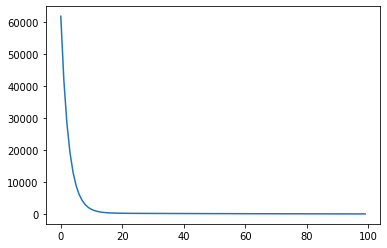

In [14]:
import matplotlib.pyplot as plt

plt.plot(range(100),loss_numpy)

In [15]:
from torch.utils.data import TensorDataset,DataLoader
import pandas as pd

In [40]:
data = pd.read_csv('insurance.csv')
data['charges'] = data['charges'].astype(float)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


In [41]:
X = data.drop('charges',axis=1)
Y = data.iloc[:,-1]

In [42]:
X = X.values
Y = Y.values

In [43]:
X = X.astype('float32')
Y = Y.astype('float32')

In [44]:
X = torch.from_numpy(X)
Y = torch.from_numpy(Y)

In [45]:
train_ds = TensorDataset(X,Y)

In [46]:
train_ds[0]

(tensor([19.0000,  1.0000, 27.9000,  0.0000,  1.0000,  1.0000]),
 tensor(16884.9238))

In [47]:
batch_size = 5

train_dl = DataLoader(train_ds,batch_size,shuffle=True)

In [48]:
import torch.nn as nn
from torch.nn.functional import mse_loss

In [49]:
model = nn.Linear(6,1)
opt = torch.optim.SGD(model.parameters(),lr = 1e-5)

In [53]:
losses = []
for i in range(100):
    for xb,yb in train_dl:
        pred = model(xb)
        loss = mse_loss(pred, yb)
        losses.append(loss)
        loss.backward()
        opt.step()
        opt.zero_grad()
        if i%10==0:
            print("In ",i," epoch currenlty loss is :- ",loss.item())

C:\Users\prasa\AppData\Local\Temp/ipykernel_9608/3451848902.py:5: UserWarning: Using a target size (torch.Size([5])) that is different to the input size (torch.Size([5, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = mse_loss(pred, yb)


In  0  epoch currenlty loss is :-  294252000.0
In  0  epoch currenlty loss is :-  56035148.0
In  0  epoch currenlty loss is :-  53458560.0
In  0  epoch currenlty loss is :-  421146240.0
In  0  epoch currenlty loss is :-  136627648.0
In  0  epoch currenlty loss is :-  232524640.0
In  0  epoch currenlty loss is :-  138096000.0
In  0  epoch currenlty loss is :-  253589744.0
In  0  epoch currenlty loss is :-  73155856.0
In  0  epoch currenlty loss is :-  332374848.0
In  0  epoch currenlty loss is :-  240411696.0
In  0  epoch currenlty loss is :-  187265968.0
In  0  epoch currenlty loss is :-  238806368.0
In  0  epoch currenlty loss is :-  117656144.0
In  0  epoch currenlty loss is :-  56752532.0
In  0  epoch currenlty loss is :-  358780032.0
In  0  epoch currenlty loss is :-  73063144.0
In  0  epoch currenlty loss is :-  57185484.0
In  0  epoch currenlty loss is :-  50165736.0
In  0  epoch currenlty loss is :-  146573200.0
In  0  epoch currenlty loss is :-  72505184.0
In  0  epoch currenlt

C:\Users\prasa\AppData\Local\Temp/ipykernel_9608/3451848902.py:5: UserWarning: Using a target size (torch.Size([3])) that is different to the input size (torch.Size([3, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = mse_loss(pred, yb)


In  10  epoch currenlty loss is :-  25157382.0
In  10  epoch currenlty loss is :-  264075536.0
In  10  epoch currenlty loss is :-  27725450.0
In  10  epoch currenlty loss is :-  299494784.0
In  10  epoch currenlty loss is :-  67858168.0
In  10  epoch currenlty loss is :-  299833472.0
In  10  epoch currenlty loss is :-  40515860.0
In  10  epoch currenlty loss is :-  48670916.0
In  10  epoch currenlty loss is :-  521125344.0
In  10  epoch currenlty loss is :-  59810612.0
In  10  epoch currenlty loss is :-  299855392.0
In  10  epoch currenlty loss is :-  91959984.0
In  10  epoch currenlty loss is :-  52618416.0
In  10  epoch currenlty loss is :-  206819136.0
In  10  epoch currenlty loss is :-  64609488.0
In  10  epoch currenlty loss is :-  44700300.0
In  10  epoch currenlty loss is :-  39477968.0
In  10  epoch currenlty loss is :-  309806464.0
In  10  epoch currenlty loss is :-  25972618.0
In  10  epoch currenlty loss is :-  345729504.0
In  10  epoch currenlty loss is :-  29334264.0
In  1